### Importing necessary libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

### We are importing the existing CIFR-10 dataset from tensorflow keras

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Reshaping, declaring labels

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [6]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))


### Using optimizer SGD 

In [7]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

history1 = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
    validation_data=(test_images, test_labels),
)


Epoch 1/5


2023-07-31 23:27:40.157308: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 9s 18ms/step - loss: 1.3749 - accuracy: 0.6218 - val_loss: 0.4481 - val_accuracy: 0.8554
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.3570 - accuracy: 0.8906 - val_loss: 0.3238 - val_accuracy: 0.8992
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.2486 - accuracy: 0.9240 - val_loss: 0.2283 - val_accuracy: 0.9278
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1956 - accuracy: 0.9401 - val_loss: 0.1550 - val_accuracy: 0.9509
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1609 - accuracy: 0.9509 - val_loss: 0.1256 - val_accuracy: 0.9606


### Using optimizer ADAM

In [8]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history2 = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
    validation_data=(test_images, test_labels),
)


Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.1328 - accuracy: 0.9594 - val_loss: 0.0870 - val_accuracy: 0.9726
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0738 - accuracy: 0.9774 - val_loss: 0.0744 - val_accuracy: 0.9777
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0599 - accuracy: 0.9824 - val_loss: 0.0541 - val_accuracy: 0.9843
Epoch 4/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0539 - accuracy: 0.9841 - val_loss: 0.0610 - val_accuracy: 0.9830
Epoch 5/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0548 - accuracy: 0.9854 - val_loss: 0.0726 - val_accuracy: 0.9827


### Using optimizer RMSPROP

In [9]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)
history3 = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
    validation_data=(test_images, test_labels),
)


Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0608 - accuracy: 0.9860 - val_loss: 0.0869 - val_accuracy: 0.9847
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0688 - accuracy: 0.9871 - val_loss: 0.1313 - val_accuracy: 0.9791
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0813 - accuracy: 0.9872 - val_loss: 0.1297 - val_accuracy: 0.9820
Epoch 4/5
469/469 [==============================] - 9s 18ms/step - loss: 0.1055 - accuracy: 0.9871 - val_loss: 0.1767 - val_accuracy: 0.9840
Epoch 5/5
469/469 [==============================] - 9s 19ms/step - loss: 0.1213 - accuracy: 0.9881 - val_loss: 0.2696 - val_accuracy: 0.9804


### Assing accuracy and loss

In [10]:
sgd_training_acc = history1.history["accuracy"]
sgd_val_acc = history1.history["val_accuracy"]
sgd_loss = history1.history["loss"]

adam_training_acc = history2.history["accuracy"]
adam_val_acc = history2.history["val_accuracy"]
adam_loss = history2.history["loss"]

rmsprop_training_acc = history3.history["accuracy"]
rmsprop_val_acc = history3.history["val_accuracy"]
rmsprop_loss = history3.history["loss"]


### Plotting training and validation accurary for corresponding optimizers in subplot

Text(0.5, 0, 'RMSProp Validation Accuracy')

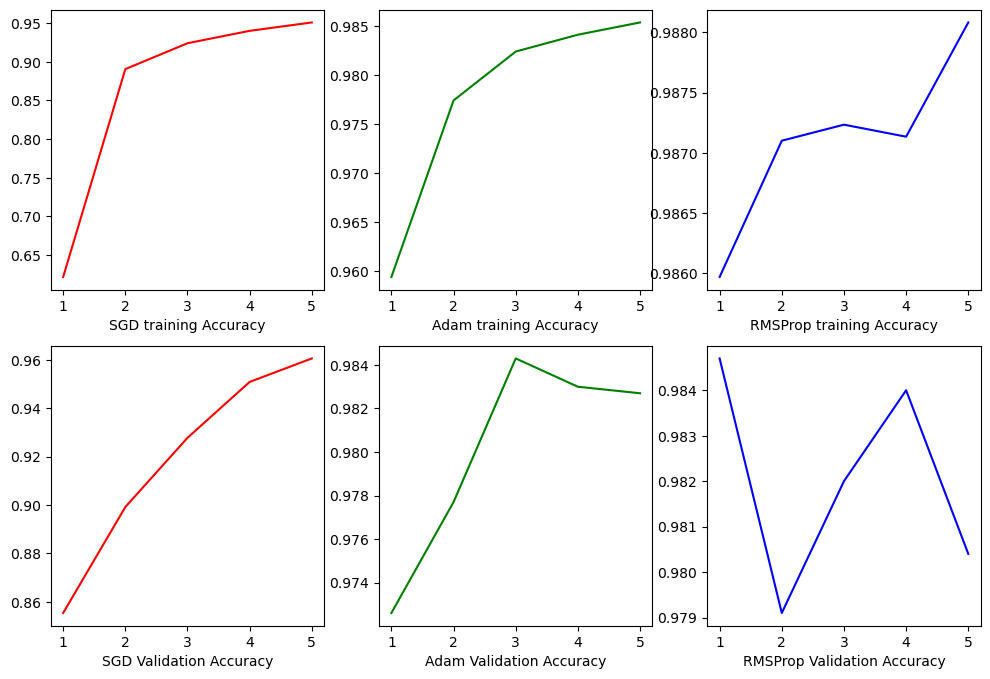

In [11]:
list = [1, 2, 3, 4, 5]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axes[0, 0].plot(list, sgd_training_acc, label="SGD training Accuracy", color="r")
axes[0, 0].set_xlabel("SGD training Accuracy")
axes[1, 0].plot(list, sgd_val_acc, label="SGD Validation Accuracy", color="r")
axes[1, 0].set_xlabel("SGD Validation Accuracy")


axes[0, 1].plot(list, adam_training_acc, label="Adam training Accuracy", color="g")
axes[0, 1].set_xlabel("Adam training Accuracy")
axes[1, 1].plot(list, adam_val_acc, label="SGD Validation Accuracy", color="g")
axes[1, 1].set_xlabel("Adam Validation Accuracy")


axes[0, 2].plot(
    list, rmsprop_training_acc, label="RMSProp training Accuracy", color="b"
)
axes[0, 2].set_xlabel("RMSProp training Accuracy")
axes[1, 2].plot(list, rmsprop_val_acc, label="RMSProp Validation Accuracy", color="b")
axes[1, 2].set_xlabel("RMSProp Validation Accuracy")


### Measaring loss for different optimizers we used

Text(0.5, 1.0, 'RmsProp LOSS')

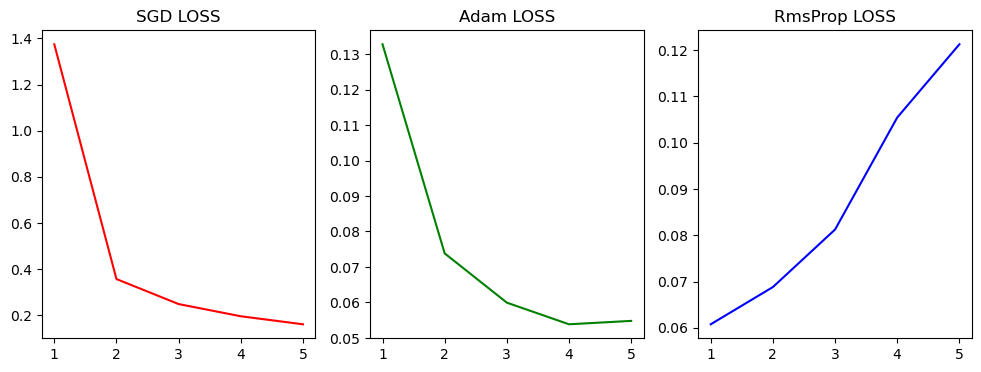

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.plot(list, sgd_loss, color="r")
ax1.set_title("SGD LOSS")

ax2.plot(list, adam_loss, color="g")
ax2.set_title("Adam LOSS")

ax3.plot(list, rmsprop_loss, color="b")
ax3.set_title("RmsProp LOSS")


# My Report

The initial plot presents a comparison of model accuracy with and without data preprocessing, using Adam, RMSProp, and SGD optimizers on the CIFAR-10 dataset. The subsequent plot visualizes the loss of these optimizers. Results indicate that data preprocessing does not consistently improve accuracy; in some cases, it can lead to reduced accuracy, such as with Adam (0.986 without preprocessing, 0.983 with preprocessing). The minimum loss is seen for adam among all the optimizers.